In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection

## First read in the dataframe. You'll notice it's similar to the dataframe that you ended the final solution with in Lesson 2, Exercise 4, only with more data:

In [2]:
d = pd.read_csv('findings_data_5000.csv')
d.head()

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,1,57,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No Finding,2,77,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Atelectasis,3,79,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Cardiomegaly|Edema|Effusion,4,55,F,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Consolidation|Mass,5,68,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Just like in Lesson 2, Exercise 4, we want to see how different diseases are distributed with our disease of interest, as well as how age and gender are distributed:

In [3]:
all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

[Text(0, 0.5, 'Number of Images with Label')]

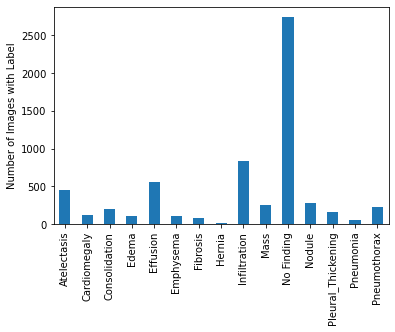

In [4]:
ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

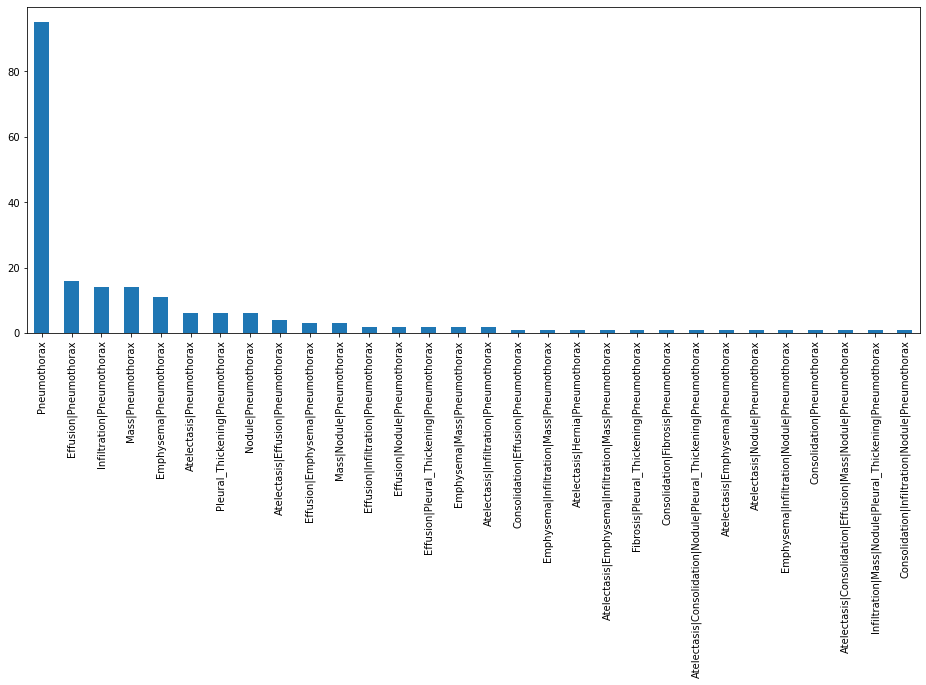

In [5]:
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize=(16,6))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

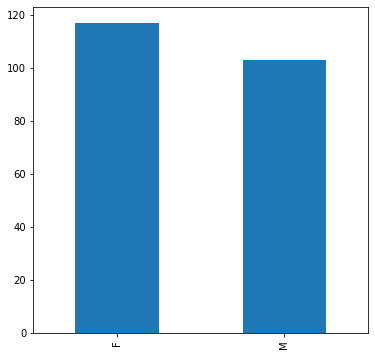

In [6]:
plt.figure(figsize=(6,6))
d[d.Pneumothorax ==1]['Patient Gender'].value_counts().plot(kind='bar')

(array([12., 18., 13., 21., 20., 47., 50., 26.,  9.,  4.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <a list of 10 Patch objects>)

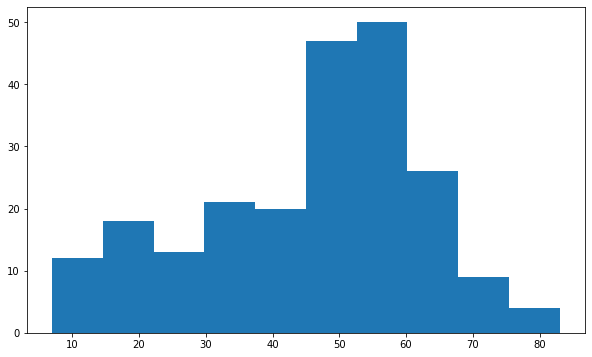

In [7]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Pneumothorax==1]['Patient Age'])

## Now, knowing what we know from above, let's create the appropriate training and validation sets for a model that we want to train to classify the presence of a Pneumothorax

Hint: you can random sample the negative cases to obtain a balanced training set.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement

#### Check number of positive cases & split them

In [9]:
print(f'Pneumathorax: {len(d[d.Pneumothorax==1])} out of {len(d)}, ratio: {100*len(d[d.Pneumothorax==1])/len(d):.2f}%')

Pneumathorax: 220 out of 4999, ratio: 4.40%


In [11]:
d_pos = d[d.Pneumothorax==1]
d_pos_train, d_pos_val = train_test_split(d_pos, test_size=0.2, stratify=d_pos['Patient Gender'])
print(f'Positive cases split, train/val: {len(d_pos_train)}/{len(d_pos_val)}')

Positive cases split, train/val: 176/44


#### Get the same number of negative cases

In [12]:
d_neg = d[d.Pneumothorax!=1]

In [13]:
ratio_neg_1 = 176/len(d_neg)
ratio_neg_1

0.03682778824021762

In [15]:
d_neg_1, d_neg_2 = train_test_split(d_neg, test_size=ratio_neg_1, stratify=d_neg['Patient Gender'])
print(f'Negative cases split: {len(d_neg_1)}/{len(d_neg_2)}')

Negative cases split: 4603/176


#### Create training set from equal number of positive & negative cases (with maximum positive cases available)

In [16]:
d_neg_train = d_neg_2
d_train = pd.concat([d_pos_train, d_neg_train])

#### Get negative cases from the rest of negative cases so that ratio with positive cases in validation set is 80% to 20% (like real world)

In [18]:
print(f'Positive records in the validation set: {len(d_pos_val)}, requires 80% negative, i.e. {len(d_pos_val)*4}')

Positive records in the validation set: 44, requires 80% negative, i.e. 176


In [19]:
sample_neg = sample_without_replacement(len(d_neg_1), 176)
d_neg_val = d_neg.iloc[sample_neg]
d_val = pd.concat([d_pos_val, d_neg_val])

#### Review train & validation sets

In [20]:
d_train

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
2582,2583,Mass|Pneumothorax,2583,58,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4170,4171,Infiltration|Pneumothorax,4171,54,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1923,1924,Atelectasis|Consolidation|Pneumothorax,1924,53,M,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2063,2064,Pneumothorax,2064,60,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3267,3268,Pneumothorax,3268,49,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,4432,No Finding,4432,63,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1972,1973,No Finding,1973,67,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4554,4555,No Finding,4555,70,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2593,2594,Emphysema,2594,54,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
assert d_train['Patient ID'].nunique() == len(d_train)
assert len(d_train[d_train['Pneumothorax']==1]) == int(len(d_train) * .5)
assert len(d_train[d_train['Pneumothorax']!=1]) == int(len(d_train) * .5)


In [27]:
d_val

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
3171,3172,Pneumothorax,3172,18,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4753,4754,Pneumothorax,4754,40,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,18,Mass|Pneumothorax,18,60,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3659,3660,Atelectasis|Pneumothorax,3660,45,F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1616,1617,Mass|Pneumothorax,1617,62,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3698,Infiltration,3698,33,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1819,1820,Edema|Effusion,1820,65,F,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,778,Nodule,778,64,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
688,689,Infiltration,689,22,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
assert d_val['Patient ID'].nunique() == len(d_val)
assert len(d_val[d_val['Pneumothorax']==1]) == int(len(d_val) * 0.2)
assert len(d_val[d_val['Pneumothorax']!=1]) == int(len(d_val) * 0.8)


#### Check demographic distributions in train & validation sets

In [42]:
def show_hist(label, bins):
    f = plt.figure()

    s1 = f.add_subplot(1, 3, 1)
    s1.set_title('All')
    s1.set_xlim((0,bins))
    d[label].hist(bins=bins)

    s2 = f.add_subplot(1, 3, 2)
    s2.set_title('Train')
    s2.set_xlim((0,bins))
    d_train[label].hist(bins=bins)

    s3 = f.add_subplot(1, 3, 3)
    s3.set_title('Validation')
    s3.set_xlim((0,bins))
    d_val[label].hist(bins=bins)


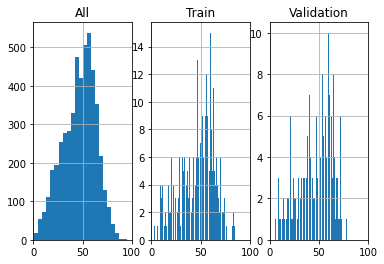

In [43]:
show_hist('Patient Age', 100)

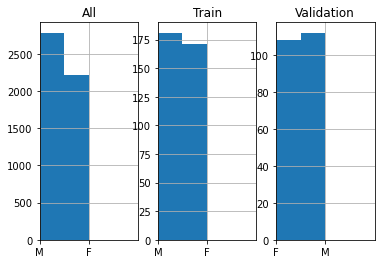

In [44]:
show_hist('Patient Gender', 2)